<a href="https://colab.research.google.com/github/wrn6494/-8-Week-SQL-Challenge/blob/main/Case_Study_5_Data_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8 Week SQL Challenge : Case Study #5 - Data Mart**

Full case study available [here.](https://8weeksqlchallenge.com/case-study-5/)

**Probem Statement/Business Task**

Danny needs your help to quantify the impact of switching to sustainable packaging methods on the sales performance for Data Mart and it’s separate business areas.

The key business question he wants you to help him answer are the following:

*  What was the quantifiable impact of the changes introduced in June 2020?
*  Which platform, region, segment and customer types were the most impacted by this change?
*  What can we do about future introduction of similar sustainability updates to the business to minimise impact on sales?





**Entity Relationship Diagram**

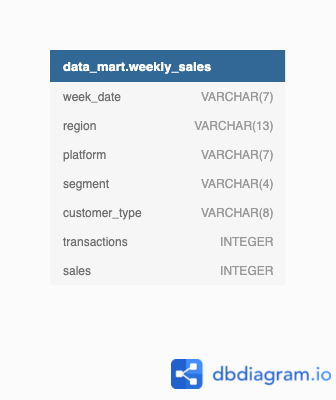

# Case Study Questions

**1. Data Cleansing Steps**

In a single query, perform the following operations and generate a new table in the data_mart schema named clean_weekly_sales:

1. Convert the week_date to a DATE format
2. Add a week_number as the second column for each week_date value, for example any value from the 1st of January to 7th of January will be 1, 8th to 14th will be 2 etc
3. Add a month_number with the calendar month for each week_date value as the 3rd column
4. Add a calendar_year column as the 4th column containing either 2018, 2019 or 2020 values
5. Add a new column called age_band after the original segment column using the following mapping on the number inside the segment value

      segment	age_band
      1	Young Adults
      2	Middle Aged
      3 or 4	Retirees

6. Add a new demographic column using the following mapping for the first letter in the segment values:

      segment	demographic
      C	Couples
      F	Families

7. Ensure all null string values with an "unknown" string value in the original segment column as well as the new age_band and demographic columns
8. Generate a new avg_transaction column as the sales value divided by transactions rounded to 2 decimal places for each record

**2. Data Exploration**

1. What day of the week is used for each week_date value?
2. What range of week numbers are missing from the dataset?
3. How many total transactions were there for each year in the dataset?
4. What is the total sales for each region for each month?
5. What is the total count of transactions for each platform
6. What is the percentage of sales for Retail vs Shopify for each month?
7. What is the percentage of sales by demographic for each year in the dataset?
8. Which age_band and demographic values contribute the most to Retail sales?
9. Can we use the avg_transaction column to find the average transaction size for each year for Retail vs Shopify? If not - how would you calculate it instead?

**3. Before & After Analysis**

This technique is usually used when we inspect an important event and want to inspect the impact before and after a certain point in time.

Taking the week_date value of 2020-06-15 as the baseline week where the Data Mart sustainable packaging changes came into effect.

We would include all week_date values for 2020-06-15 as the start of the period after the change and the previous week_date values would be before

Using this analysis approach - answer the following questions:

1. What is the total sales for the 4 weeks before and after 2020-06-15? 
2. What is the growth or reduction rate in actual values and percentage of sales?
2. What about the entire 12 weeks before and after?
3. How do the sale metrics for these 2 periods before and after compare with the previous years in 2018 and 2019?

**4. Bonus Question**
1. Which areas of the business have the highest negative impact in sales metrics performance in 2020 for the 12 week before and after period?

  *   region
  *   platform
  *   age_band
  *   demographic
  *   customer_type

2. Do you have any further recommendations for Danny’s team at Data Mart or any interesting insights based off this analysis?

# 1. Data Cleansing Steps

      SELECT 
        TO_DATE(week_date,'DD/MM/YY') AS week_date,
        DATE_PART('week', TO_DATE(week_date,'DD/MM/YY')) AS week_number,
        DATE_PART('month', TO_DATE(week_date,'DD/MM/YY')) AS month_number,  
        DATE_PART('year', TO_DATE(week_date,'DD/MM/YY')) AS calendar_year,
        region,
        platform,
        (CASE WHEN segment='null' THEN 'unknown' ELSE segment END) AS segment,
        (CASE WHEN segment LIKE '%1' THEN 'Young Adults'
              WHEN  segment LIKE '%2' THEN 'Middle Aged'
              WHEN  segment='unknown' THEN 'unknown'   
              ELSE 'Retirees' END) AS age_band,
        (CASE WHEN segment LIKE 'C%' THEN 'Couples'
            WHEN  segment LIKE 'F%' THEN 'Families' 	   
              ELSE 'unknown' END) AS demographic,  
        customer_type,
        transactions,
        sales,
        ROUND((sales/transactions)::NUMERIC,2)AS avg_transaction
      INTO clean_weekly_sales
      FROM data_mart.weekly_sales;

# 2. Data Exploration

**2.1 What day of the week is used for each week_date value?**

    SELECT DISTINCT (to_char(week_date, 'DAY'))
    FROM data_mart.clean_weekly_sales;

| to_char   |
| --------- |
| MONDAY    |


**2.2 What range of week numbers are missing from the dataset?**

    SELECT DISTINCT week_number
    FROM data_mart.clean_weekly_sales
    ORDER BY week_number;

| week_number |
| ----------- |
| 13          |
| 14          |
| 15          |
| 16          |
| 17          |
| 18          |
| 19          |
| 20          |
| 21          |
| 22          |
| 23          |
| 24          |
| 25          |
| 26          |
| 27          |
| 28          |
| 29          |
| 30          |
| 31          |
| 32          |
| 33          |
| 34          |
| 35          |
| 36          |

The missing week numbers are 1-12 and 37-53.

**2.3 How many total transactions were there for each year in the dataset?**

    SELECT calendar_year, COUNT(transactions)
        FROM data_mart.clean_weekly_sales
        GROUP BY calendar_year
        ORDER BY calendar_year;

| calendar_year | count |
| ------------- | ----- |
| 2018          | 5698  |
| 2019          | 5708  |
| 2020          | 5711  |


**2.4 What is the total sales for each region for each month?**

    SELECT region, month_number, SUM(sales)
    FROM data_mart.clean_weekly_sales
    GROUP BY region,month_number
    ORDER BY region,month_number;

| region        | month_number | sum        |
| ------------- | ------------ | ---------- |
| AFRICA        | 3            | 567767480  |
| AFRICA        | 4            | 1911783504 |
| AFRICA        | 5            | 1647244738 |
| AFRICA        | 6            | 1767559760 |
| AFRICA        | 7            | 1960219710 |
| AFRICA        | 8            | 1809596890 |
| AFRICA        | 9            | 276320987  |
| ASIA          | 3            | 529770793  |
| ASIA          | 4            | 1804628707 |
| ASIA          | 5            | 1526285399 |
| ASIA          | 6            | 1619482889 |
| ASIA          | 7            | 1768844756 |
| ASIA          | 8            | 1663320609 |
| ASIA          | 9            | 252836807  |
| CANADA        | 3            | 144634329  |
| CANADA        | 4            | 484552594  |
| CANADA        | 5            | 412378365  |
| CANADA        | 6            | 443846698  |
| CANADA        | 7            | 477134947  |
| CANADA        | 8            | 447073019  |
| CANADA        | 9            | 69067959   |
| EUROPE        | 3            | 35337093   |
| EUROPE        | 4            | 127334255  |
| EUROPE        | 5            | 109338389  |
| EUROPE        | 6            | 122813826  |
| EUROPE        | 7            | 136757466  |
| EUROPE        | 8            | 122102995  |
| EUROPE        | 9            | 18877433   |
| OCEANIA       | 3            | 783282888  |
| OCEANIA       | 4            | 2599767620 |
| OCEANIA       | 5            | 2215657304 |
| OCEANIA       | 6            | 2371884744 |
| OCEANIA       | 7            | 2563459400 |
| OCEANIA       | 8            | 2432313652 |
| OCEANIA       | 9            | 372465518  |
| SOUTH AMERICA | 3            | 71023109   |
| SOUTH AMERICA | 4            | 238451531  |
| SOUTH AMERICA | 5            | 201391809  |
| SOUTH AMERICA | 6            | 218247455  |
| SOUTH AMERICA | 7            | 235582776  |
| SOUTH AMERICA | 8            | 221166052  |
| SOUTH AMERICA | 9            | 34175583   |
| USA           | 3            | 225353043  |
| USA           | 4            | 759786323  |
| USA           | 5            | 655967121  |
| USA           | 6            | 703878990  |
| USA           | 7            | 760331754  |
| USA           | 8            | 712002790  |
| USA           | 9            | 110532368  |

**2.5 What is the total count of transactions for each platform**

    SELECT platform, COUNT(transactions)
        FROM data_mart.clean_weekly_sales
        GROUP BY platform;

| platform | count |
| -------- | ----- |
| Shopify  | 8549  |
| Retail   | 8568  |

**2.6 What is the percentage of sales for Retail vs Shopify for each month?**

    WITH A AS (
       SELECT platform, calendar_year,month_number, sum(sales) AS sales
       FROM   data_mart.clean_weekly_sales
       GROUP  BY platform, calendar_year,month_number
       )
       
    SELECT platform, calendar_year,month_number, ROUND((sales/sum(sales) OVER (PARTITION BY calendar_year,month_number))::NUMERIC*100,2) AS percent
    FROM  A
    ORDER  BY calendar_year,month_number,platform;

| platform | calendar_year | month_number | percent |
| -------- | ------------- | ------------ | ------- |
| Retail   | 2018          | 3            | 97.92   |
| Shopify  | 2018          | 3            | 2.08    |
| Retail   | 2018          | 4            | 97.93   |
| Shopify  | 2018          | 4            | 2.07    |
| Retail   | 2018          | 5            | 97.73   |
| Shopify  | 2018          | 5            | 2.27    |
| Retail   | 2018          | 6            | 97.76   |
| Shopify  | 2018          | 6            | 2.24    |
| Retail   | 2018          | 7            | 97.75   |
| Shopify  | 2018          | 7            | 2.25    |


*NOTE: Resulting table is truncated because it is long to display here.


**2.7 What is the percentage of sales by demographic for each year in the dataset?**

    WITH A AS (
       SELECT demographic, calendar_year, sum(sales) AS sales
       FROM   data_mart.clean_weekly_sales
       GROUP  BY demographic, calendar_year
       )
    
    SELECT demographic, calendar_year, ROUND((sales/sum(sales) OVER (PARTITION BY calendar_year))::NUMERIC*100,2) AS percent
    FROM  A
    ORDER  BY calendar_year,demographic;

| demographic | calendar_year | percent |
| ----------- | ------------- | ------- |
| Couples     | 2018          | 26.38   |
| Families    | 2018          | 31.99   |
| unknown     | 2018          | 41.63   |
| Couples     | 2019          | 27.28   |
| Families    | 2019          | 32.47   |
| unknown     | 2019          | 40.25   |
| Couples     | 2020          | 28.72   |
| Families    | 2020          | 32.73   |
| unknown     | 2020          | 38.55   |

**2.8 Which age_band and demographic values contribute the most to Retail sales?**

    WITH A AS (
       SELECT demographic, age_band, sum(sales) AS sales
       FROM   data_mart.clean_weekly_sales
       WHERE platform='Retail' 
       GROUP  BY demographic, age_band
    
       )
    
    SELECT demographic, age_band, ROUND((sales/sum(sales) OVER ())::NUMERIC*100,2) AS percent
    FROM  A
    ORDER  BY demographic, age_band;

| demographic | age_band     | percent |
| ----------- | ------------ | ------- |
| Couples     | Middle Aged  | 4.68    |
| Couples     | Retirees     | 16.07   |
| Couples     | Young Adults | 6.56    |
| Families    | Middle Aged  | 10.98   |
| Families    | Retirees     | 16.73   |
| Families    | Young Adults | 4.47    |
| unknown     | Retirees     | 40.52   |

Families and Retirees have larger share to Retail Sales.

**2.9 Can we use the avg_transaction column to find the average transaction size for each year for Retail vs Shopify? If not - how would you calculate it instead?**

No, because it uses the values repeatedly the value will become smaller and inaccurate. It is better to use the original values.

    WITH retail AS 
    (
       SELECT calendar_year,SUM(transactions) AS t, SUM(sales)
       FROM data_mart.clean_weekly_sales
       WHERE platform='Retail'
       GROUP BY calendar_year
    ),
    shopify AS 
    (
       SELECT calendar_year, SUM(transactions) AS t, SUM(sales)
       FROM data_mart.clean_weekly_sales
       WHERE platform='Shopify'
       GROUP BY calendar_year
    )
    
    SELECT r.calendar_year, (r.sum/r.t) AS retail_average, (s.sum/s.t) AS shopify_average
    FROM  retail r 
    JOIN shopify s
    USING (calendar_year);

| calendar_year | retail_average | shopify_average |
| ------------- | -------------- | --------------- |
| 2018          | 36             | 192             |
| 2019          | 36             | 183             |
| 2020          | 36             | 179             |

# 3. Before & After Analysis

**1. What is the total sales for the 4 weeks before and after 2020-06-15?**

**2. What is the growth or reduction rate in actual values and percentage of sales?**


    WITH before AS
    (
    SELECT SUM(sales)
    FROM data_mart.clean_weekly_sales
    WHERE calendar_year=2020
    AND week_date>= (TO_DATE('2020-06-15','YYYY-MM-DD') - interval '4 week')
    AND week_date< TO_DATE('2020-06-15','YYYY-MM-DD')
    ),
    after AS
    (
    SELECT SUM(sales)
    FROM data_mart.clean_weekly_sales
    WHERE calendar_year=2020
    AND week_date<= (TO_DATE('2020-06-15','YYYY-MM-DD') + interval '3 week')
    AND week_date>= TO_DATE('2020-06-15','YYYY-MM-DD')
    )
    
    SELECT b.sum AS before_sales,a.sum AS after_sales, a.sum-b.sum AS difference,
    	ROUND(((a.sum-b.sum)::NUMERIC/b.sum)*100,2) AS growth_rate
    FROM before b,after a;

| before_sales | after_sales | difference | growth_rate             |
| ------------ | ----------- | ---------- | ----------------------- |
| 2345878357   | 2318994169  | -26884188  | -1.15|

**3. What about the entire 12 weeks before and after?**

    WITH before AS
    (
    SELECT SUM(sales)
    FROM data_mart.clean_weekly_sales
    WHERE calendar_year=2020
    AND week_date>= (TO_DATE('2020-06-15','YYYY-MM-DD') - interval '12 week')
    AND week_date< TO_DATE('2020-06-15','YYYY-MM-DD')
    ),
    after AS
    (
    SELECT SUM(sales)
    FROM data_mart.clean_weekly_sales
    WHERE calendar_year=2020
    AND week_date<= (TO_DATE('2020-06-15','YYYY-MM-DD') + interval '11 week')
    AND week_date>= TO_DATE('2020-06-15','YYYY-MM-DD')
    )
    
    SELECT b.sum AS before_sales,a.sum AS after_sales, a.sum-b.sum AS difference,
    	((a.sum-b.sum)::NUMERIC/b.sum)*100 AS growth_rate
    FROM before b,after a;

| before_sales | after_sales | difference | growth_rate             |
| ------------ | ----------- | ---------- | ----------------------- |
| 7126273147   | 6973947753  | -152325394 | -2.13751831929324165200 |


**4. How do the sale metrics for these 2 periods before and after compare with the previous years in 2018 and 2019?**

12 weeks before and after June 15

    WITH before AS
    (
    SELECT SUM(sales), calendar_year
    FROM data_mart.clean_weekly_sales
    WHERE week_number>= DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD')) - 12
    AND week_number< DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD'))
    GROUP BY calendar_year
    ),
    after AS
    (
    SELECT SUM(sales), calendar_year
    FROM data_mart.clean_weekly_sales
    WHERE week_number<= DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD')) + 11
    AND week_number>= DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD'))
    GROUP BY calendar_year
    )
    
    SELECT a.calendar_year,b.sum AS before_sales, a.sum AS after_sales, a.sum-b.sum AS difference,
    	ROUND(((a.sum-b.sum)::NUMERIC/b.sum)*100,2) AS growth_rate
    FROM before b
    JOIN after a
    USING (calendar_year);

| calendar_year | before_sales | after_sales | difference | growth_rate             |
| ------------- | ------------ | ----------- | ---------- | ----------------------- |
| 2018          | 6396562317   | 6500818510  | 104256193  | 1.63  |
| 2019          | 6883386397   | 6862646103  | -20740294  | -0.30|
| 2020          | 7126273147   | 6973947753  | -152325394 | -2.14 |


4 weeks before and after June 15

    WITH before AS
    (
    SELECT SUM(sales), calendar_year
    FROM data_mart.clean_weekly_sales
    WHERE week_number>= DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD')) - 4
    AND week_number< DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD'))
    GROUP BY calendar_year
    ),
    after AS
    (
    SELECT SUM(sales), calendar_year
    FROM data_mart.clean_weekly_sales
    WHERE week_number<= DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD')) + 3
    AND week_number>= DATE_PART('week', TO_DATE('2020-06-15','YYYY-MM-DD'))
    GROUP BY calendar_year
    )
    
    SELECT a.calendar_year,b.sum AS before_sales, a.sum AS after_sales, a.sum-b.sum AS difference,
    	ROUND(((a.sum-b.sum)::NUMERIC/b.sum)*100,0) AS growth_rate
    FROM before b
    JOIN after a
    USING (calendar_year);

| calendar_year | before_sales | after_sales | difference | growth_rate             |
| ------------- | ------------ | ----------- | ---------- | ----------------------- |
| 2018          | 2125140809   | 2129242914  | 4102105    | 0.19|
| 2019          | 2249989796   | 2252326390  | 2336594    | 0.10 |
| 2020          | 2345878357   | 2318994169  | -26884188  | -1.15|

The sales was lower after the change. There was a -1.15 and -2.14 growth. Comparing all the years, the lowest was in 2020.

# 4. Bonus Question

**1. Which areas of the business have the highest negative impact in sales metrics performance in 2020 for the 12 week before and after period?**

*   region
*   platform
*   age_band
*   demographic
*   customer_type

    WITH before AS
    (
    SELECT region, SUM(sales)
    FROM data_mart.clean_weekly_sales
    WHERE calendar_year=2020
    AND week_date>= (TO_DATE('2020-06-15','YYYY-MM-DD') - interval '12 week')
    AND week_date< TO_DATE('2020-06-15','YYYY-MM-DD')
    GROUP BY region 
    ),
    after AS
    (
    SELECT region,SUM(sales)
    FROM data_mart.clean_weekly_sales
    WHERE calendar_year=2020
    AND week_date<= (TO_DATE('2020-06-15','YYYY-MM-DD') + interval '11 week')
    AND week_date>= TO_DATE('2020-06-15','YYYY-MM-DD')
    GROUP BY region 
    )
    
    SELECT a.region, b.sum AS before_sales,a.sum AS after_sales, a.sum-b.sum AS difference,
        ROUND(((a.sum-b.sum)::NUMERIC/b.sum)*100,2) AS growth_rate
    FROM before b
    JOIN after a
    USING (region);

| region        | before_sales | after_sales | difference | growth_rate |
| ------------- | ------------ | ----------- | ---------- | ----------- |
| AFRICA        | 1709537105   | 1700390294  | -9146811   | -0.54       |
| ASIA          | 1637244466   | 1583807621  | -53436845  | -3.26       |
| CANADA        | 426438454    | 418264441   | -8174013   | -1.92       |
| EUROPE        | 108886567    | 114038959   | 5152392    | 4.73        |
| OCEANIA       | 2354116790   | 2282795690  | -71321100  | -3.03       |
| SOUTH AMERICA | 213036207    | 208452033   | -4584174   | -2.15       |
| USA           | 677013558    | 666198715   | -10814843  | -1.60       |

Using the same structure of CTE, we got the following tables:

| platform | before_sales | after_sales | difference | growth_rate |
| -------- | ------------ | ----------- | ---------- | ----------- |
| Retail   | 6906861113   | 6738777279  | -168083834 | -2.43       |
| Shopify  | 219412034    | 235170474   | 15758440   | 7.18        |

| age_band     | before_sales | after_sales | difference | growth_rate |
| ------------ | ------------ | ----------- | ---------- | ----------- |
| Middle Aged  | 1164847640   | 1141853348  | -22994292  | -1.97       |
| Retirees     | 5159618979   | 5037676437  | -121942542 | -2.36       |
| Young Adults | 801806528    | 794417968   | -7388560   | -0.92       |

| demographic | before_sales | after_sales | difference | growth_rate |
| ----------- | ------------ | ----------- | ---------- | ----------- |
| Couples     | 2033589643   | 2015977285  | -17612358  | -0.87       |
| Families    | 2328329040   | 2286009025  | -42320015  | -1.82       |
| unknown     | 2764354464   | 2671961443  | -92393021  | -3.34       |

| customer_type | before_sales | after_sales | difference | growth_rate |
| ------------- | ------------ | ----------- | ---------- | ----------- |
| Existing      | 3690116427   | 3606243454  | -83872973  | -2.27       |
| Guest         | 2573436301   | 2496233635  | -77202666  | -3.00       |
| New           | 862720419    | 871470664   | 8750245    | 1.01        |

Overall here it the growth rate per each metric. The following was computed through excel.

| metrics | average_growth_rate |
| ------------- | ------------ |
| region       | -1.11       |
| platform        | 2.38       |
| age_band              | -1.75        |
| demographic              | -2.01        |
| customer_type             | -1.42        |